### K Means Kümeleme

1. Önce sklearn'de hazır dataseti yükledik.
2. data'yı oluşturduk. 200 örnekli, 2 özellikli, 4 kümeli (merkezli), standard sapma 1.8.
3. data bir tuple oldu. Bunun 0. elemanı özelliklerin olduğu eleman, 1. elemanı da bunların aslında hangi kümeye ait oldukları.
4. datayı plotlayıp gördük. 
5. K Means import ettik.
6. n_cluster (number of cluster) ile küme sayısını belirledik.
7. datayı modele fit ettik.
8. modelin oluşturduğu merkez koordinatlarını bulduk.
9. Modelin tahminlerini inceledik. (kmeans.labels_)
10. Orijinal veri sonucumuzla tahminlerimizi plot üzerinden karşılaştırdık.

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [20]:
# sklearn ile yapay bir veri üretip onun üzerinde çalışacağız

from sklearn.datasets import make_blobs

In [21]:
data=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)
# centers = küme sayısı

In [22]:
data # data bir tuple oldu.

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [23]:
data[0] #2 özellikli bir numpy array

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [24]:
data[0].shape #200'e 2 lik bir numpy array

(200, 2)

In [25]:
data[1].shape #bu da kümelerin (4 küme) olduğu 200 lük bir array

(200,)

In [26]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

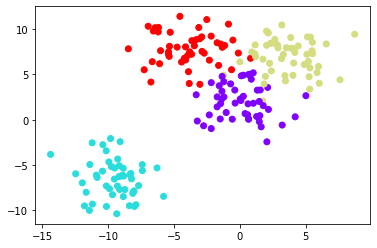

In [28]:
plt.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap="rainbow")

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(2)

In [32]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.cluster_centers_

array([[-0.0336134 ,  5.54542558],
       [-9.46941837, -6.56081545]])

In [34]:
kmeans.labels_ # bunlar bizim predictied value'larımız. 
# normalde bize doğru sonuçlar verilmez. burada karşılaştırma yapabilmek için verdi.

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0])

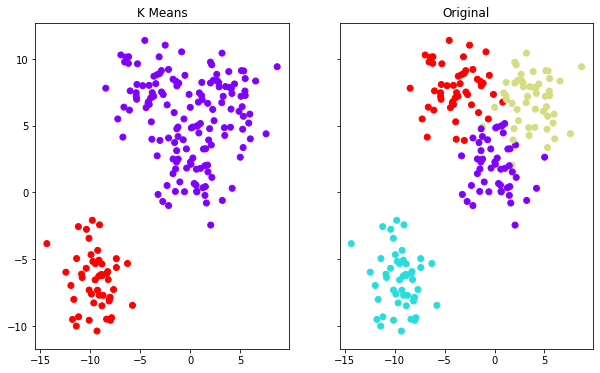

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap="rainbow")

ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [41]:
data_scaled=scaler.fit_transform(data[0])

In [42]:
data_scaled

array([[-7.74096520e-01,  1.27068730e+00],
       [ 1.58438109e+00,  4.47149481e-01],
       [ 3.86725509e-01,  1.24266191e-01],
       [ 8.74415352e-01,  1.17431161e+00],
       [ 1.43601767e+00,  7.81635534e-01],
       [-1.62754802e+00, -1.43902757e+00],
       [ 8.48958550e-01,  1.20826033e+00],
       [ 1.29373614e-01, -1.84187539e-01],
       [ 6.83075780e-01,  9.54685135e-01],
       [ 1.99592419e-01,  1.02289800e-01],
       [-7.27423994e-01,  1.19282621e+00],
       [ 2.28990811e-01, -2.46326446e-03],
       [ 1.01560289e+00,  8.99161528e-01],
       [ 9.17702800e-01,  4.77262898e-01],
       [-5.52893927e-01,  1.18687492e+00],
       [ 3.50151125e-01, -4.10573971e-01],
       [ 1.60445855e+00,  5.58946370e-01],
       [ 1.51532948e-02, -3.32562516e-01],
       [-1.48478099e+00, -9.91939137e-01],
       [-4.12003971e-01,  1.47922183e+00],
       [-1.53869317e+00, -1.36605598e+00],
       [ 5.86355490e-01, -4.04205041e-01],
       [ 8.64406670e-01,  1.73462512e-01],
       [-1.

### Küme Sayısını Bulma

Küme sayısını belirledik. Algoritmayı çalıştırdık. Algoritma her bir noktayı bir kümeye yerleştirdi. Her bir noktanın küme merkezine olan uzaklığının karesinin toplamını alıyoruz (**wcss-within clusters sum of squares yani noktaların merkezlere uzaklıklarının karelerinin toplamı**). Bunu her küme için yapıyoruz. Toplamda çıkan rakam ne kadar düşük ise kümeleme o kadar iyi çalışmış merkez noktalar ile kümeye dahil noktalar birbirine yakın durmuş demektir.

In [43]:
wcss=[] 

for i in range(1,30):  
        kmeans = KMeans(i)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_) # inerita: her bir k değeri için wcss değerini bulur.
wcss        

[400.0,
 124.45178163978889,
 71.8783589639794,
 42.18786354558244,
 35.875963399747775,
 31.61318412337719,
 27.50118052317394,
 24.28023992388482,
 21.364637597734266,
 19.608327547660274,
 17.64063938224012,
 15.88947260111845,
 15.24420218627613,
 13.986901646544847,
 12.451558687478077,
 11.989381393884614,
 10.874712461628437,
 10.613670795825646,
 9.799374642616565,
 9.077462772529458,
 8.689470961173397,
 8.232607412181885,
 8.197636691739847,
 7.654589308231413,
 7.12315335364384,
 6.806688929498464,
 6.563613005899347,
 6.364759940221963,
 6.017193328564856]

Text(0, 0.5, 'WCSS')

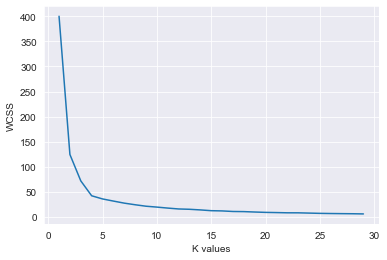

In [45]:
# Şimdi görselleştirerek ELBOW metoduna göre en uygun k değerini bulalım
sns.set_style("darkgrid")
plt.plot(range(1,30),wcss,)
plt.xlabel("K values")
plt.ylabel("WCSS")

**SONUÇTA ELBOW METODUNA GÖRE EN UYGU K DEĞERİ 4 ÇIKTI. ŞİMDİ K=4 YAPRAK MODELİ ÇALIŞTIRALIM.**

In [47]:
kmeans=KMeans(4)
kmeans.fit(data_scaled)
model_pred = kmeans.predict(data_scaled)

Text(0.5, 1.0, 'Model Predict')

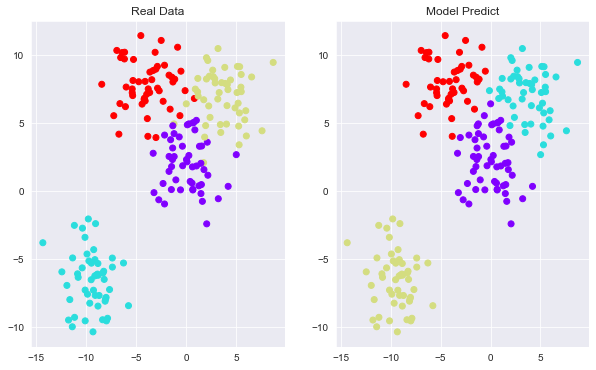

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

ax1.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")
ax1.set_title("Real Data")

ax2.scatter(data[0][:,0],data[0][:,1],c=model_pred,cmap="rainbow")
ax2.set_title("Model Predict")

In [69]:
sticked=pd.DataFrame({"x":data[1],"y":model_pred})
sticked

,x,y
0,3,3
1,2,1
2,0,0
3,2,1
4,2,1
...,...,...
195,0,0
196,2,1
197,2,1
198,1,2


In [80]:
sticked["x"].value_counts()

3    50
2    50
1    50
0    50
Name: x, dtype: int64

(array([55.,  0.,  0., 49.,  0.,  0., 50.,  0.,  0., 46.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

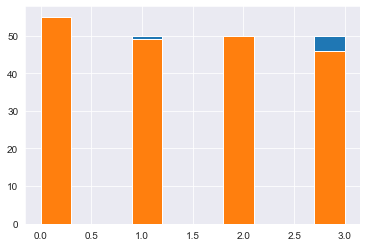

In [90]:
plt.hist(sticked["x"].values)
plt.hist(sticked["y"].values)